In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from dtw import DynamicTimeWarping
from time_series import TimeSeries, TimeSeriesGenerator

## Getting started
We first create 2 time series

In [2]:
timeseries_gen = TimeSeriesGenerator()
s1 = timeseries_gen.generate_timeseries(pattern='FFFFUUFFFDFD',    
                                     n_points=10, 
                                     start_val=0, 
                                     amplitude=1, 
                                     step=20, 
                                     has_seed=True, 
                                     seed=42)
s2 = timeseries_gen.generate_timeseries(pattern='FFUUFFFDFD', 
                                     n_points=10, 
                                     start_val=0, 
                                     amplitude=1, 
                                     step=20, 
                                     has_seed=False)


Let's plot them.
Notice that `s1` looks similar to `s2`, except for being a bit longer at the beginning.

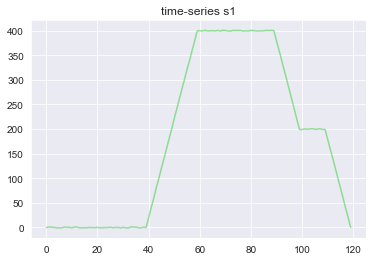

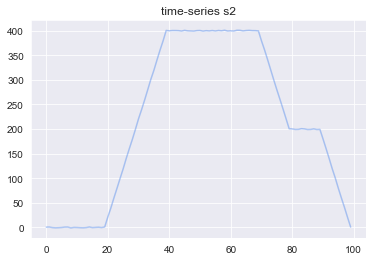

In [3]:
s1.plot(color='limegreen', alpha=0.5, title='time-series s1')
s2.plot(color='cornflowerblue', alpha=0.5, title='time-series s2')

## Dynamic Time Warping algorithm
Let's apply the algorithm on them

In [4]:
algo = DynamicTimeWarping(s1, s2)
# For illustration purpose, we downsampling time series such that the longest length is 40
DTW_dist, matrix, connection_list, new_s1, new_s2 = algo.compute(max_ele=40) 

### Illustration 1: For Developer
We will show how DTW matrix looks after the computation.

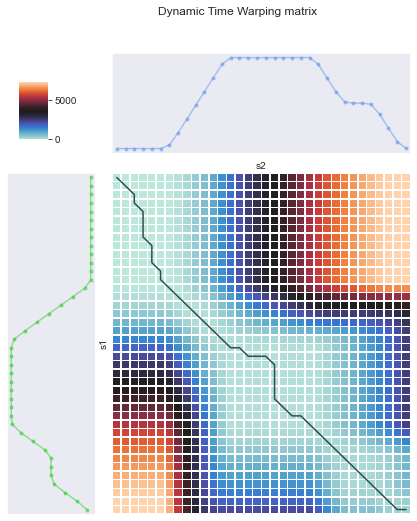

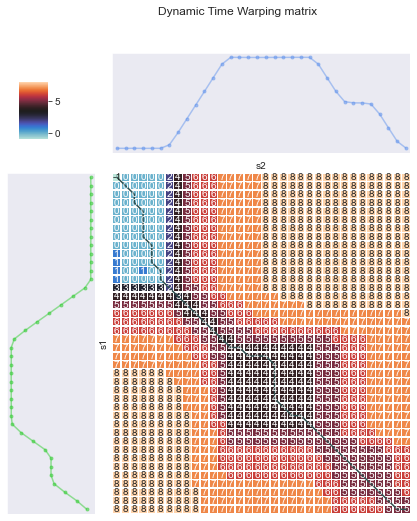

In [5]:
# No information shown but the heatmap
algo.plot_matrix(matrix=matrix, connection_list=connection_list, s1=new_s1, s2=new_s2, use_log=False, show_numb=False)

# All information shown
algo.plot_matrix(matrix=matrix, connection_list=connection_list, s1=new_s1, s2=new_s2, use_log=True, show_numb=True)

You can save the image with below command

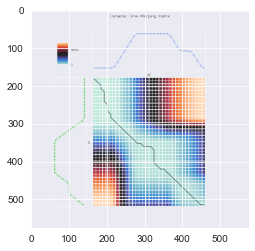

In [6]:
# save image
algo.plot_matrix(matrix=matrix, connection_list=connection_list, s1=new_s1, s2=new_s2, use_log=False, show_numb=False
                 , is_saved=True, img_name='DTW_matrix.png')

# load image
plt.figure()
img = plt.imread('DTW_matrix.png')
plt.imshow(img)
plt.show()

You can generate a gif to demonstrate the algorithm too!

In [7]:
algo.generate_algorithm_gif(matrix=matrix, connection_list=connection_list, s1=new_s1, s2=new_s2, use_log=False,
                            show_numb=False, is_saved=True, gif_name='DTW_algo_animation.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


![Fig01](DTW_algo_animation.gif)

### Illustration 2: For User
We will show the generated mapping between the 2 time series, with DTW distance is the absolute sum.

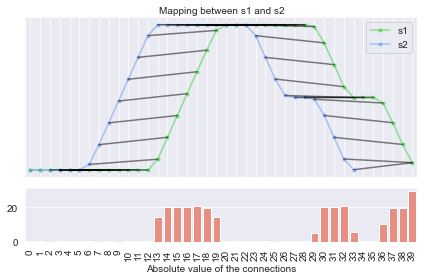

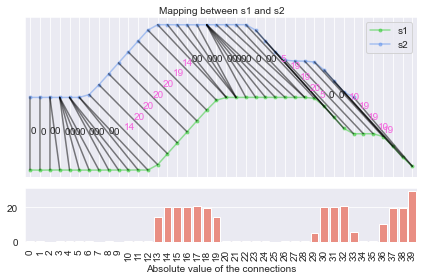

In [8]:
# When time series not in ideal position to show mapping and no information shown
algo.plot_series_mapping(s1=new_s1, s2=new_s2, connection_list=connection_list, show_connection_val=False, illustrate_gap=0)

# When time series in a better position with all information shown
algo.plot_series_mapping(s1=new_s1, s2=new_s2, connection_list=connection_list, show_connection_val=True, illustrate_gap=400)

You can save the image with below command

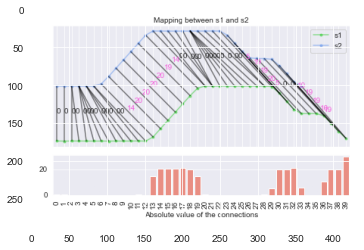

In [9]:
# save image
algo.plot_series_mapping(s1=new_s1, s2=new_s2, connection_list=connection_list, show_connection_val=True, illustrate_gap=400,
                        is_saved=True, img_name='series_mapping.png')

# load image
plt.figure()
img = plt.imread('series_mapping.png')
plt.imshow(img)
plt.show()

### Illustration 3: Advanced
We use the mapping to sampling s1 to the same length with s2.

In [10]:
# We reshape new_s1 to the same shape with new_s2
new_s1_reshaped = algo.reshape_s1_to_s2(s1=new_s1, s2=new_s2, connection_list=connection_list)

Before the reshape

new_s1: 40 elements.
new_s2: 34 elements.
DTW_dist: 282.63440971660117


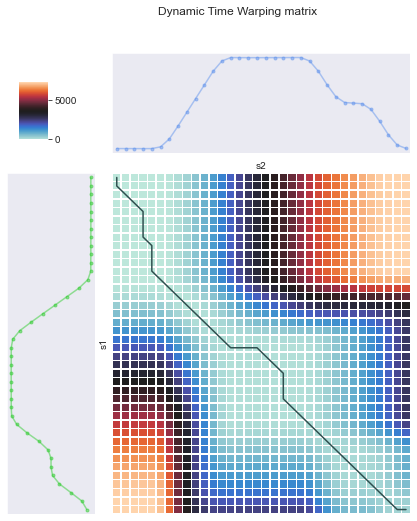

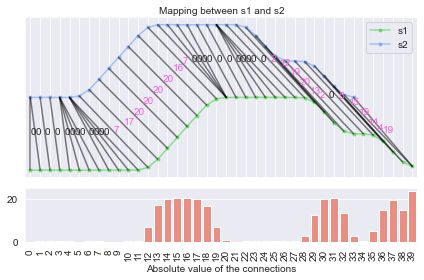

In [13]:
print (f'new_s1: {len(new_s1)} elements.')
print (f'new_s2: {len(new_s2)} elements.')
algo = DynamicTimeWarping(s1=new_s1, s2=new_s2)
DTW_dist, matrix, connection_list, s1_shown, s2_shown = algo.compute(max_ele=40)
print (f'DTW_dist: {DTW_dist}')
algo.plot_matrix(matrix=matrix, connection_list=connection_list, s1=s1_shown, s2=s2_shown, use_log=False, show_numb=False)
algo.plot_series_mapping(s1=s1_shown, s2=s2_shown, connection_list=connection_list, show_connection_val=True, illustrate_gap=400)

After the reshape

new_s1_reshaped: 34 elements.
new_s2: 34 elements.
DTW_dist: 317.7991054082282


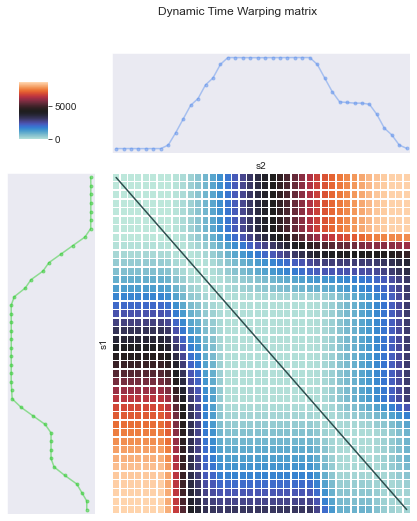

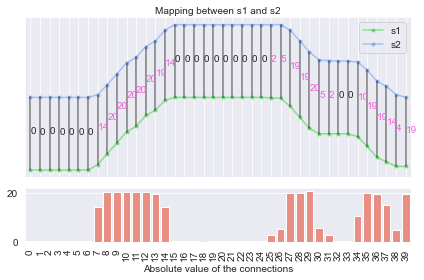

In [15]:
print (f'new_s1_reshaped: {len(new_s1_reshaped)} elements.')
print (f'new_s2: {len(new_s2)} elements.')
algo = DynamicTimeWarping(s1=new_s1_reshaped, s2=new_s2)
DTW_dist, matrix, connection_list, s1_shown, s2_shown = algo.compute(max_ele=40)
print (f'DTW_dist: {DTW_dist}')
algo.plot_matrix(matrix=matrix, connection_list=connection_list, s1=s1_shown, s2=s2_shown, use_log=False, show_numb=False)
algo.plot_series_mapping(s1=s1_shown, s2=s2_shown, connection_list=connection_list, show_connection_val=True, illustrate_gap=400)